In [1]:
import math
import copy 
import tqdm
import time
import torch
import gpytorch
import pickle 
import itertools 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict, OrderedDict

from math import comb
from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML
from IPython.display import clear_output

import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "~/skisg/"
sys.path.append(os.environ['PRJ'])

random.seed(1337)
np.random.seed(1337)

%matplotlib inline
%load_ext autoreload
%autoreload 2

/var/folders/gj/ns_zjdqx57b1mrqf3l8_rcd40000gp/T/ipykernel_98296/1388026961.py:16: DeprecationWarning: Please use `asmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import asmatrix


In [2]:
from skisg.config import SgBasisType
from skisg.interp.sparse.sglocations import get_sg_points_nd

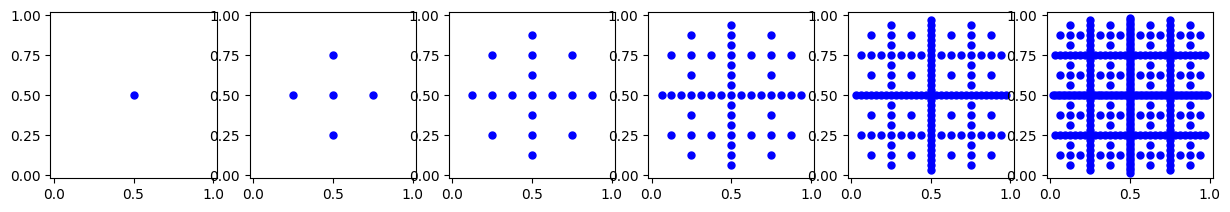

In [3]:
# Visuals of SgBasisType.NAIVE or SgBasisType.MODIFIED

gtype = SgBasisType.MODIFIED

ndim = 2

fig1, axs = plt.subplots(1, 6, figsize=(15, 5))
for grid_level in range(0, 6):        
    ax = axs[grid_level]
    grid = get_sg_points_nd(grid_level, ndim, basis=gtype)
    ax.plot(grid[:, 0], grid[:, 1], 'bo', markersize=5)                    
    ax.set_ylim(-0.02, 1.02)
    ax.set_xlim(-0.02, 1.02)
    ax.set_aspect(1.0)
plt.show()

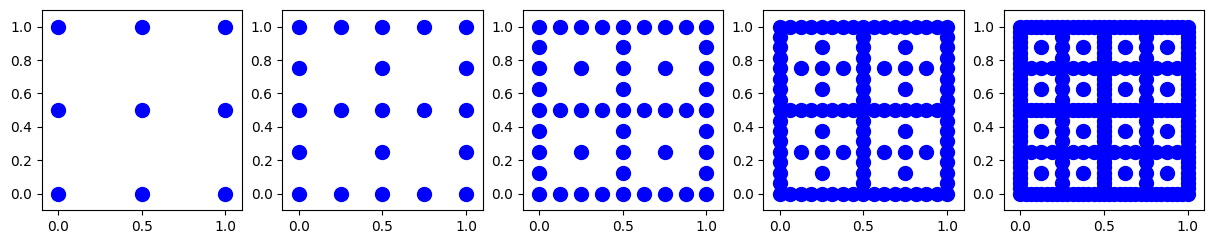

In [4]:
gtype = SgBasisType.BOUNDSTART

ndim = 2

fig1, axs = plt.subplots(1, 5, figsize=(15, 5))
i=0
for grid_level in range(0, -1 + 6):        
    ax = axs[i]
    grid = get_sg_points_nd(grid_level, ndim, basis=gtype)
    ax.plot(grid[:, 0], grid[:, 1], 'bo', markersize=10)                    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_aspect(1.0)
    i += 1
plt.show()

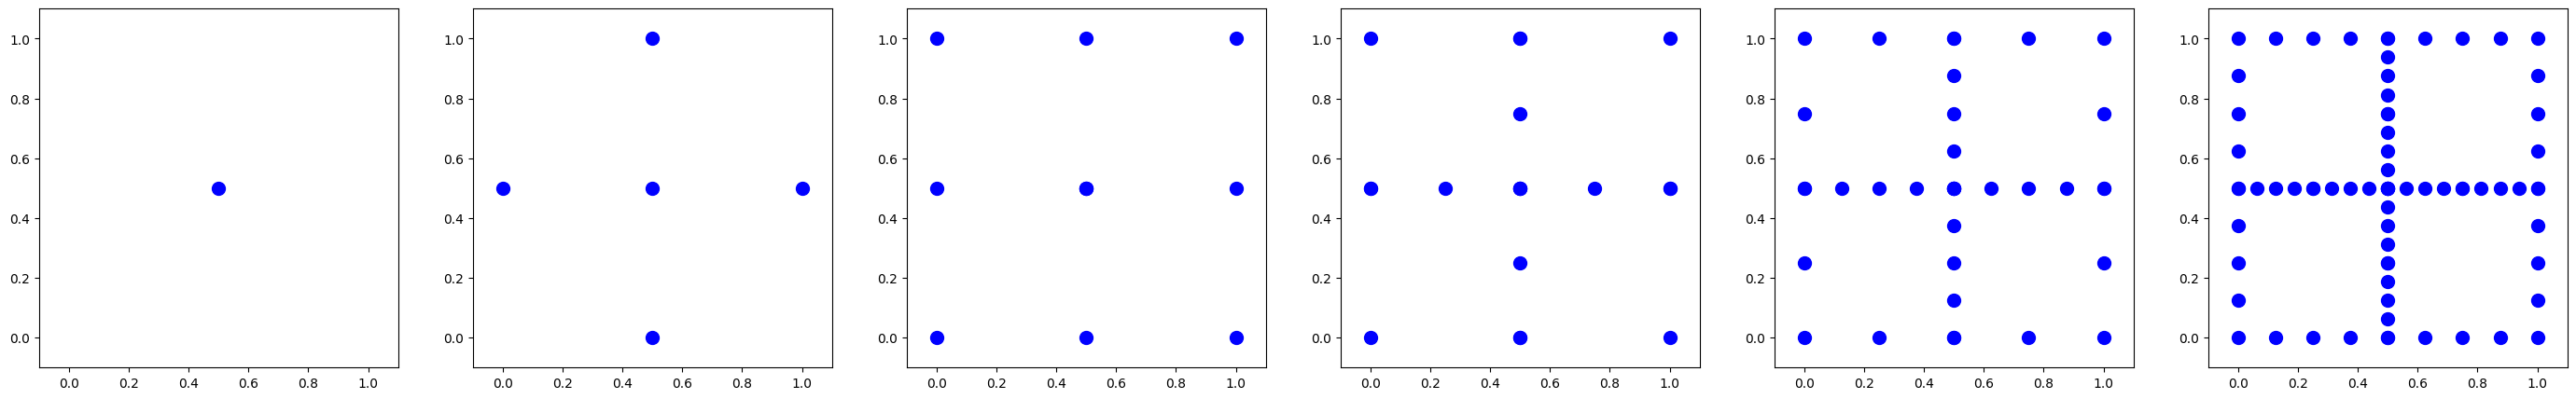

In [5]:

# Visuals of SgBasisType.CONSSTART

gtype = SgBasisType.CONSSTART

ndim = 2
ml = 7
fig1, axs = plt.subplots(1, ml-1, figsize=(5*ml, 5))
i=0
for grid_level in range(-2, -2+ ml-1):        
    ax = axs[i]
    grid = get_sg_points_nd(grid_level, ndim, basis=gtype)
    ax.plot(grid[:, 0], grid[:, 1], 'bo', markersize=10)                    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_aspect(1.0)
    i += 1
plt.show()

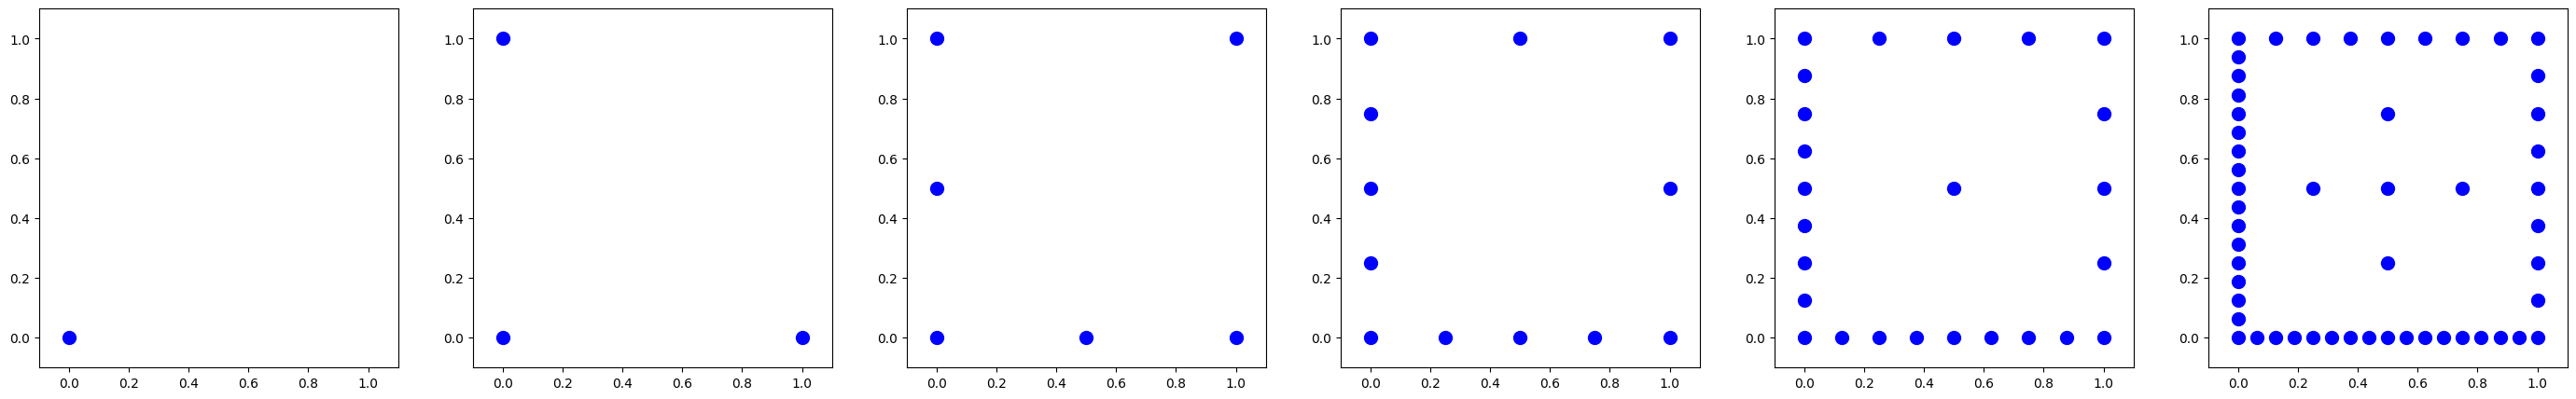

In [6]:
# Visuals of SgBasisType.ANOVA 

gtype = SgBasisType.ANOVA

ndim = 2
ml = 7
fig1, axs = plt.subplots(1, ml-1, figsize=(5*ml, 5))
i=0
for grid_level in range(-2, -2+ ml-1):        
    ax = axs[i]
    grid = get_sg_points_nd(grid_level, ndim, basis=gtype)
    ax.plot(grid[:, 0], grid[:, 1], 'bo', markersize=10)                    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_aspect(1.0)
    i += 1
plt.show()
